In [0]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [0]:
# para gerar o grafico no browser
%matplotlib inline

In [0]:
# local dos dados e modifica o diretorio
#path='/home/ucfilho/Documents/Aulas/Ago_29_2018'
#os.chdir(path)
!git clone http://github.com/ucfilho/ANN
%cd ANN
!ls  

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN
ANN
ann_aula_ago_14_2018_leitura_git.ipynb
ANN_aula_Scikit_learn _ago_29_2018.ipynb
ANN_Hydrofoil_ago_29_2018.txt.ipynb
ANN_Hydrofoil_Clean_02_set_12_2018.ipynb
ANN_Hydrofoil_Neuronicos_02__set_12_2018.ipynb
ANN_Hydrofoil_set_05_2018.ipynb
ANN_Hydrofoil_set_12_2018.ipynb
Aprendendo_Um_Pouco_mais_sobre_Python_set_05_2018.ipynb
arvore.jpg
Aula_003_Python_audio_e_imagem_ago_29_2018.ipynb
aula_04_rede_neural_set_05_2018.pdf
BBC_007041008.wav
Criando_Gethub_Ver_Youtube.txt
FAULT_DIAGNOSIS_maio_25_2017.txt
Hydrofoil_ago_29_2018.csv
john_mccarthy.png
Paper_Carvao_China_abril_12_2016.csv
Paper_Carvao_China_mar_31_2016.txt
README.md
simbolos.pdf
Video_mp4_Python_Notebook.ipynb


In [0]:
# leitura dos dados
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
#DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv",index_col="emit")

In [0]:
# separa as colunas de interesse
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [0]:
# funcao normatiza dados, intervalo de -1 a 1)
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
# separa os dados em normatizados e originais
DAT_OLD=[]
# Guarda os dados antes de serem normatizados, para que não sejam perdidos
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
print(DAT.head())
print('================================================================')
print(DAT_OLD.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0       -1.0 -1.000000   -1.000000 -0.883085 -1.000000 -1.000000
1       -1.0 -0.913570   -0.986458 -0.895478 -0.459481 -0.999415
2       -1.0 -0.896283   -0.980729 -0.898111 -0.462157 -0.999001
3       -1.0 -0.861711   -0.966146 -0.916618 -0.456079 -0.997659
4       -1.0 -0.844425   -0.956354 -0.924482 -0.449160 -0.996605
   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [0]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
#train e test possui tanto x (entrada/independente) quanto y (saida/dependente)
print(train.head())
print("===================================================================")
print(train.shape[0]) #mostrar o numero de linhas
print("===================================================================")
print(test.head())
print("===================================================================")
print(test.shape[0])

    Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
57        1.0  0.797753    0.546875  0.884836  0.171315  0.390449
54        1.0  0.555748    0.244792  0.842428  0.290669 -0.031709
48        1.0 -0.481417   -0.278646 -0.671829  0.719959 -0.812959
3        -1.0 -0.861711   -0.966146 -0.916618 -0.456079 -0.997659
47        1.0 -0.654278   -0.619792 -0.967466 -0.156350 -0.934277
47
    Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
4   -1.000000 -0.844425   -0.956354 -0.924482 -0.449160 -0.996605
11  -1.000000  0.210026    0.332812  0.151034  0.786861 -0.193631
13  -1.000000  0.555748    0.510417  0.578270  0.966493  0.174914
26  -0.333333  0.555748    0.442708  0.642230  0.409505  0.122245
28  -0.333333  0.728608    0.697917  0.680172  0.353671  0.467517
12


In [0]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1]]
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_OLD.iloc[:,[0,1]]
print(x_test.head())
print('================================================================')
print(x_train.head())
print('================================================================')
print(X_OLD.head())

    Hydrofoil    Froude
4   -1.000000 -0.844425
11  -1.000000  0.210026
13  -1.000000  0.555748
26  -0.333333  0.555748
28  -0.333333  0.728608
    Hydrofoil    Froude
57        1.0  0.797753
54        1.0  0.555748
48        1.0 -0.481417
3        -1.0 -0.861711
47        1.0 -0.654278
   Hydrofoil    Froude
0          1  0.000000
1          1  0.103733
2          1  0.124480
3          1  0.165973
4          1  0.186719


In [0]:
# obtem as variaveis dependentes (treino e teste)
Index=[2,3,4,5]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print(y_test.head())
print('================================================================')
print(y_train.head())
print('================================================================')
print(Y_OLD.head())

    Resistence   Sinkage      Trim     Power
4    -0.956354 -0.924482 -0.449160 -0.996605
11    0.332812  0.151034  0.786861 -0.193631
13    0.510417  0.578270  0.966493  0.174914
26    0.442708  0.642230  0.409505  0.122245
28    0.697917  0.680172  0.353671  0.467517
    Resistence   Sinkage      Trim     Power
57    0.546875  0.884836  0.171315  0.390449
54    0.244792  0.842428  0.290669 -0.031709
48   -0.278646 -0.671829  0.719959 -0.812959
3    -0.966146 -0.916618 -0.456079 -0.997659
47   -0.619792 -0.967466 -0.156350 -0.934277
   Resistence   Sinkage      Trim     Power
0    0.000000  0.000000  0.000000  0.000000
1    2.549729 -0.689028  1.353022  0.950991
2    3.628461 -0.835413  1.346323  1.624000
3    6.374322 -1.864337  1.361538  3.803965
4    8.217973 -2.301539  1.378858  5.517212


In [0]:
# define a rede neural 
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(8), 
                    random_state=1)

In [0]:
# treina a rede neural
clf.fit(x_train, y_train)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=8, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
# usa a rede neural treina em calculos para treino e teste
# predizer os dados de saida (y) tanto para traino quanto para teste
# pois quero no gráfico essas duas informações
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)
print(y_calc_train[0:5,:])

[[ 0.51138987  0.9281127   0.15660345  0.36278367]
 [ 0.23183741  0.79817141  0.30494623 -0.0443896 ]
 [-0.33783249 -0.74239851  0.55228179 -0.82197939]
 [-0.95818996 -0.92140425 -0.52359654 -1.00970235]
 [-0.61960296 -0.88793714  0.0759418  -0.92501182]]


In [0]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names
print(y_calc_train.head())

   Resistence   Sinkage      Trim     Power
0    0.511390  0.928113  0.156603  0.362784
1    0.231837  0.798171  0.304946 -0.044390
2   -0.337832 -0.742399  0.552282 -0.821979
3   -0.958190 -0.921404 -0.523597 -1.009702
4   -0.619603 -0.887937  0.075942 -0.925012


In [0]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
print(y_calc_test.head())
print('================================================================')
print(y_calc_train.head())

   Resistence    Sinkage      Trim        Power
0   11.385864  -2.044139  1.310792   -12.504590
1  228.330089  66.011672  4.554949  1186.916065
2  278.135021  77.763268  4.545677  1872.973023
3  277.409910  81.675013  3.830919  1859.461619
4  316.525104  86.591517  3.714635  2362.792348
   Resistence     Sinkage      Trim        Power
0  284.576092  100.696984  2.895199  2214.596754
1  231.939809   93.472650  3.266530  1552.918297
2  124.677985    7.821731  3.885658   289.293069
3    7.872316   -2.130434  1.192529   -15.766842
4   71.624077   -0.269767  2.693288   121.859821


In [0]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [0]:
# escolhe uma das resposta para fazer o grafico (resistencia-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Resistence'].copy()
resist_obs_train=train['Resistence'].copy()

In [0]:
# escolhe uma das resposta para fazer o grafico (resistencia-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Resistence'].copy()
resist_obs_test=test['Resistence'].copy()
print(resist_calc_test.head())

0     11.385864
1    228.330089
2    278.135021
3    277.409910
4    316.525104
Name: Resistence, dtype: float64


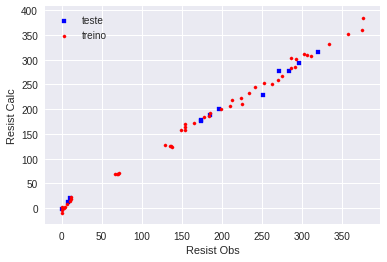

In [0]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)#mostra dois graficos sob o mesmo eixo 

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')
plt.show()

In [0]:
#from é usado para carregar apenas uma função de uma biblioteca
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [0]:
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 62.64857181469038
R^2 teste= 0.994927126497979


In [0]:
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 61.29759565561881
R^2 treino= 0.9952405663423282


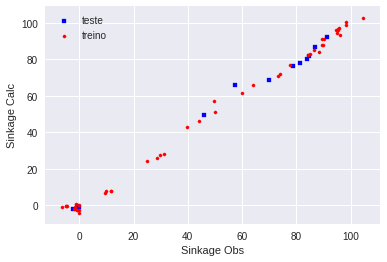

MSE teste= 10.579359510095328
R^2 teste= 0.9915404358577283
MSE treino= 6.978203679209644
R^2 treino= 0.995743215487447


In [0]:
#variavel Sinkage
resist_calc_train=y_calc_train['Sinkage'].copy()
resist_obs_train=train['Sinkage'].copy()
resist_calc_test=y_calc_test['Sinkage'].copy()
resist_obs_test=test['Sinkage'].copy()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Sinkage Calc')
plt.xlabel('Sinkage Obs')
plt.show()
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)
print('================================================================')
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

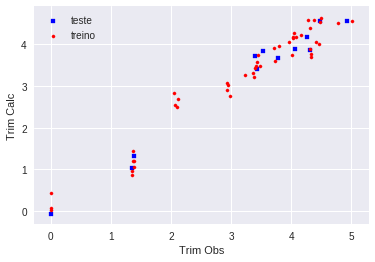

MSE teste= 0.05800985500472546
R^2 teste= 0.9723050513857383
MSE treino= 0.09043163996095104
R^2 treino= 0.9481754941454326


In [0]:
#variavel Trim
resist_calc_train=y_calc_train['Trim'].copy()
resist_obs_train=train['Trim'].copy()
resist_calc_test=y_calc_test['Trim'].copy()
resist_obs_test=test['Trim'].copy()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Trim Calc')
plt.xlabel('Trim Obs')
plt.show()
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)
print('================================================================')
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

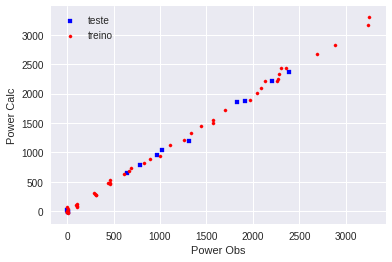

MSE teste= 1631.673869555173
R^2 teste= 0.9975623718625174
MSE treino= 2056.974405660312
R^2 treino= 0.9979148520552994


In [0]:
#variavel Power
resist_calc_train=y_calc_train['Power'].copy()
resist_obs_train=train['Power'].copy()
resist_calc_test=y_calc_test['Power'].copy()
resist_obs_test=test['Power'].copy()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Power Calc')
plt.xlabel('Power Obs')
plt.show()
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)
print('================================================================')
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)